

# Project: European Soccer Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, we will be working on the European Soccer Database obtained from [Kaggle](https://www.kaggle.com/hugomathien/soccer) to answer the following questions:
1. What's the avergae number of games played every season for the 11 european leagues?
2. Which season witnessed the most number of goals?
3. Who are the players that scored an overall rating closest to the potential rating?


In [1]:
#Importing packages, including sqlite3 to access the soccer database 'database.sqlite'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
%matplotlib inline
sns.set_style('darkgrid')

#Creating a connection with the database file
cn = sql.connect('database.sqlite')


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Loading players' data into a dataframe by joining two tables: 'Player' and 'Player_Attributes'
query= "SELECT * FROM Player P JOIN Player_Attributes PA ON P.player_api_id = PA.player_api_id AND P.player_fifa_api_id = PA.player_fifa_api_id"
player_df= pd.read_sql_query(query, cn)

#Loading teams' data into a dataframe by joining two tables: 'Team' and 'Team_Attributes'
query= "SELECT * FROM Team T JOIN Team_Attributes TA ON T.team_api_id = TA.team_api_id AND T.team_fifa_api_id = TA.team_fifa_api_id"
team_df= pd.read_sql_query(query, cn)

#Loading games' data into a dataframe by joining three tables: 'Match', 'League' and 'Country'
query= "SELECT * FROM Match M JOIN League L ON M.league_id = L.id JOIN Country C ON M.country_id = C.id"
match_df= pd.read_sql_query(query, cn)

### Exploring Data

#### 1. Exploring Players DataFrame

In [3]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183766 entries, 0 to 183765
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183766 non-null  int64  
 1   player_api_id        183766 non-null  int64  
 2   player_name          183766 non-null  object 
 3   player_fifa_api_id   183766 non-null  int64  
 4   birthday             183766 non-null  object 
 5   height               183766 non-null  float64
 6   weight               183766 non-null  int64  
 7   id                   183766 non-null  int64  
 8   player_fifa_api_id   183766 non-null  int64  
 9   player_api_id        183766 non-null  int64  
 10  date                 183766 non-null  object 
 11  overall_rating       183016 non-null  float64
 12  potential            183016 non-null  float64
 13  preferred_foot       183016 non-null  object 
 14  attacking_work_rate  180622 non-null  object 
 15  defensive_work_ra

#### 2. Exploring Teams DataFrame

In [5]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,8485,2011-02-22 00:00:00,47,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [6]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_api_id                     1458 non-null   int64  
 2   team_fifa_api_id                1458 non-null   int64  
 3   team_long_name                  1458 non-null   object 
 4   team_short_name                 1458 non-null   object 
 5   id                              1458 non-null   int64  
 6   team_fifa_api_id                1458 non-null   int64  
 7   team_api_id                     1458 non-null   int64  
 8   date                            1458 non-null   object 
 9   buildUpPlaySpeed                1458 non-null   int64  
 10  buildUpPlaySpeedClass           1458 non-null   object 
 11  buildUpPlayDribbling            489 non-null    float64
 12  buildUpPlayDribblingClass       14

>We can see that the Players DataFrame includes a total of 30 columns and 1458 entries/rows. We can also see that some of the columns are duplicated due to joining two tables.

#### 3. Exploring Match DataFrame

In [7]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,GBD,GBA,BSH,BSD,BSA,id,country_id,name,id,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.25,4.00,1.73,3.40,4.20,1,1,Belgium Jupiler League,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.75,1.91,3.25,3.60,1,1,Belgium Jupiler League,1,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.20,2.50,2.30,3.20,2.75,1,1,Belgium Jupiler League,1,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,5.50,1.44,3.75,6.50,1,1,Belgium Jupiler League,1,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.50,1.65,4.75,3.30,1.67,1,1,Belgium Jupiler League,1,Belgium


In [8]:
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id,country_id,id
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663,11738.630317,11738.630317,11738.630317
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814,7553.936759,7553.936759,7553.936759
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000,1.000000,1.000000,1.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000,4769.000000,4769.000000,4769.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000,10257.000000,10257.000000,10257.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000,17642.000000,17642.000000,17642.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000,24558.000000,24558.000000,24558.000000


In [9]:
match_df.shape

(25979, 120)

>The Match DataFrame consists of 25979 rows and 120 columns.

### Data Cleaning

#### 1. Cleaning Players Data

In [10]:
#Re-loading data from the database but choosing only the necessary columns to answer our questions
query= "SELECT P.player_api_id, player_name, date, overall_rating, potential, positioning, marking FROM Player P JOIN Player_Attributes PA ON P.player_api_id = PA.player_api_id"
player_df= pd.read_sql_query(query, cn)

player_df.head()

,player_api_id,player_name,date,overall_rating,potential,positioning,marking
0,505942,Aaron Appindangoye,2016-02-18 00:00:00,67.0,71.0,45.0,65.0
1,505942,Aaron Appindangoye,2015-11-19 00:00:00,67.0,71.0,45.0,65.0
2,505942,Aaron Appindangoye,2015-09-21 00:00:00,62.0,66.0,45.0,65.0
3,505942,Aaron Appindangoye,2015-03-20 00:00:00,61.0,65.0,44.0,62.0
4,505942,Aaron Appindangoye,2007-02-22 00:00:00,61.0,65.0,44.0,62.0


In [11]:
print('==  Players DataFrame  ==')
print("Total number of rows: ", player_df.shape[0])
print("Total number of rows with a null value: ", player_df.isna().sum().sum())
print("Total number of duplicated rows: ", player_df.duplicated().sum())

==  Players DataFrame  ==
Total number of rows:  183978
Total number of rows with a null value:  3344
Total number of duplicated rows:  1


In [12]:
#Dropping duplicated rows
player_df.drop_duplicates(inplace=True)
print("Total number of duplicated rows: ", player_df.duplicated().sum())

Total number of duplicated rows:  0


In [13]:
#Checking if the columns have the right data types
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183977 entries, 0 to 183977
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183977 non-null  int64  
 1   player_name     183977 non-null  object 
 2   date            183977 non-null  object 
 3   overall_rating  183142 non-null  float64
 4   potential       183142 non-null  float64
 5   positioning     183142 non-null  float64
 6   marking         183142 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.2+ MB


In [14]:
#ID column must be a string, not an integer
player_df['player_api_id'] = player_df['player_api_id'].astype(str)
player_df.dtypes

player_api_id      object
player_name        object
date               object
overall_rating    float64
potential         float64
positioning       float64
marking           float64
dtype: object

In [15]:
player_df.isna().sum()

player_api_id       0
player_name         0
date                0
overall_rating    835
potential         835
positioning       835
marking           835
dtype: int64

> We notice that the total number of nulls for the four columns (overall_rating, potentail, postioning and marking) is the same. Let's find out if these null values always share the same row.

In [16]:
#Extracting only the rows with NaN values for all three columns (overall_rating, potentail, postioning and marking)
no_game = player_df['overall_rating'].isna() & player_df['potential'].isna() & player_df['positioning'].isna() & player_df['marking'].isna()
player_df[no_game]

,player_api_id,player_name,date,overall_rating,potential,positioning,marking
483,31684,Abdeslam Ouaddou,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
983,29904,Abel Gomez,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
1752,24159,Adam Johnson,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
2089,31916,Adam Rooney,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
2482,37249,Adil Chihi,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
182587,25538,Youssouf Hadji,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
183249,32633,Zbigniew Malkowski,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
183309,33823,Zdenek Pospech,2007-02-22 00:00:00,NaN,NaN,NaN,NaN
183361,25772,Zdravko Kuzmanovic,2007-02-22 00:00:00,NaN,NaN,NaN,NaN


> Since the total number of rows is also 835, it means that the player did not play on this date. Thus, the solution to dealing with those null values is to drop their rows. 

In [17]:
#Cleaning Players data by dropping rows with null values
player_df.dropna(axis=0, how='any', inplace=True)

player_df

,player_api_id,player_name,date,overall_rating,potential,positioning,marking
0,505942,Aaron Appindangoye,2016-02-18 00:00:00,67.0,71.0,45.0,65.0
1,505942,Aaron Appindangoye,2015-11-19 00:00:00,67.0,71.0,45.0,65.0
2,505942,Aaron Appindangoye,2015-09-21 00:00:00,62.0,66.0,45.0,65.0
3,505942,Aaron Appindangoye,2015-03-20 00:00:00,61.0,65.0,44.0,62.0
4,505942,Aaron Appindangoye,2007-02-22 00:00:00,61.0,65.0,44.0,62.0
...,...,...,...,...,...,...,...
183973,39902,Zvjezdan Misimovic,2009-08-30 00:00:00,83.0,85.0,86.0,22.0
183974,39902,Zvjezdan Misimovic,2009-02-22 00:00:00,78.0,80.0,72.0,32.0
183975,39902,Zvjezdan Misimovic,2008-08-30 00:00:00,77.0,80.0,72.0,32.0
183976,39902,Zvjezdan Misimovic,2007-08-30 00:00:00,78.0,81.0,68.0,28.0


In [18]:
#Recheck for null values
player_df.isna().sum()

player_api_id     0
player_name       0
date              0
overall_rating    0
potential         0
positioning       0
marking           0
dtype: int64

In [19]:
player_df.rename(columns={'player_api_id':'player_id'}, inplace=True)
player_df.head()

,player_id,player_name,date,overall_rating,potential,positioning,marking
0,505942,Aaron Appindangoye,2016-02-18 00:00:00,67.0,71.0,45.0,65.0
1,505942,Aaron Appindangoye,2015-11-19 00:00:00,67.0,71.0,45.0,65.0
2,505942,Aaron Appindangoye,2015-09-21 00:00:00,62.0,66.0,45.0,65.0
3,505942,Aaron Appindangoye,2015-03-20 00:00:00,61.0,65.0,44.0,62.0
4,505942,Aaron Appindangoye,2007-02-22 00:00:00,61.0,65.0,44.0,62.0


#### Table Findings
> The Players DataFrame consists of 7 columns to show the overall rating, potential and marking for each player for each game he played in. Date of the match is also shown in the table.

#### 2. Cleaning Teams Data

In [20]:
#Re-loading data from the database but choosing only the necessary columns to answer our questions
query= "SELECT team_api_id, team_long_name, team_short_name FROM Team"
team_df= pd.read_sql_query(query, cn)

In [21]:
print('==  Teams DataFrame  ==')
print("Total number of coulmns: ", team_df.shape[1])
print("Total number of rows: ", team_df.shape[0])
print("Total number of rows with a null value: ", team_df.isna().sum().sum())
print("Total number of duplicated rows: ", team_df.duplicated().sum())

==  Teams DataFrame  ==
Total number of coulmns:  3
Total number of rows:  299
Total number of rows with a null value:  0
Total number of duplicated rows:  0


>No need to drop duplicated rows or deal with null values since there's none.

In [22]:
#Checking if the columns have the right data types
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team_api_id      299 non-null    int64 
 1   team_long_name   299 non-null    object
 2   team_short_name  299 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


In [23]:
#ID column must be a string, not an integer
team_df['team_api_id'] = team_df['team_api_id'].astype(str)
team_df.dtypes

team_api_id        object
team_long_name     object
team_short_name    object
dtype: object

In [24]:
team_df

,team_api_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB
...,...,...,...
294,10190,FC St. Gallen,GAL
295,10191,FC Thun,THU
296,9777,Servette FC,SER
297,7730,FC Lausanne-Sports,LAU


>Team DataFrame consists of 299 European team

#### Table Findings
> Teams DataFrame consists of three columns to show the team ID, name of the team and an appreviation for the team's name.

#### 3. Cleaning Matches Data

In [25]:
#Re-loading data from the database but choosing only the necessary columns to answer our questions
query = 'SELECT match_api_id as match_id, season, stage, date, T1.team_long_name as home_team, T2.team_long_name as away_team, home_team_goal, away_team_goal, L.name as league, C.name as country '\
        'FROM Match M JOIN Team T1 ON M.home_team_api_id = T1.team_api_id '\
        'JOIN Team T2 ON M.away_team_api_id = T2.team_api_id '\
        'JOIN League L ON M.league_id = L.id '\
        'JOIN Country C ON M.country_id = C.id'
        
match_df= pd.read_sql_query(query, cn)

In [26]:
print('==  Matches DataFrame  ==')
print("Total number of coulmns: ", match_df.shape[1])
print("Total number of rows: ", match_df.shape[0])
print("Total number of rows with a null value: ", match_df.isna().sum().sum())
print("Total number of duplicated rows: ", match_df.duplicated().sum())

==  Matches DataFrame  ==
Total number of coulmns:  10
Total number of rows:  25979
Total number of rows with a null value:  0
Total number of duplicated rows:  0


>No need to drop duplicated rows or deal with null values since there's none.

In [27]:
match_df

,match_id,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,league,country
0,492473,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,Belgium Jupiler League,Belgium
1,492474,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,Belgium Jupiler League,Belgium
2,492475,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,Belgium Jupiler League,Belgium
3,492476,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,Belgium Jupiler League,Belgium
4,492477,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,Belgium Jupiler League,Belgium
...,...,...,...,...,...,...,...,...,...,...
25974,1992091,2015/2016,9,2015-09-22 00:00:00,FC St. Gallen,FC Thun,1,0,Switzerland Super League,Switzerland
25975,1992092,2015/2016,9,2015-09-23 00:00:00,FC Vaduz,FC Luzern,1,2,Switzerland Super League,Switzerland
25976,1992093,2015/2016,9,2015-09-23 00:00:00,Grasshopper Club Zürich,FC Sion,2,0,Switzerland Super League,Switzerland
25977,1992094,2015/2016,9,2015-09-22 00:00:00,Lugano,FC Zürich,0,0,Switzerland Super League,Switzerland


In [28]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        25979 non-null  int64 
 1   season          25979 non-null  object
 2   stage           25979 non-null  int64 
 3   date            25979 non-null  object
 4   home_team       25979 non-null  object
 5   away_team       25979 non-null  object
 6   home_team_goal  25979 non-null  int64 
 7   away_team_goal  25979 non-null  int64 
 8   league          25979 non-null  object
 9   country         25979 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.0+ MB


In [29]:
#Changing the ID and satge data type to string instead of integer
match_df[['match_id','stage']] = match_df[['match_id','stage']].astype(str)
match_df.dtypes

match_id          object
season            object
stage             object
date              object
home_team         object
away_team         object
home_team_goal     int64
away_team_goal     int64
league            object
country           object
dtype: object

In [30]:
#creating a function to set the match result for the home team
def result(home_goal, away_goal):
    result = home_goal - away_goal
    if result > 0:
        return 'Home Win'
    elif result < 0:
        return 'Away Win'
    elif result == 0:
        return 'Tie'

#Creating a new column by applying the result function to every row
match_df['result'] = match_df.apply(lambda row: result(row['home_team_goal'], row['away_team_goal']), axis=1)

match_df.head()

,match_id,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,league,country,result
0,492473,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,Belgium Jupiler League,Belgium,Tie
1,492474,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,Belgium Jupiler League,Belgium,Tie
2,492475,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,Belgium Jupiler League,Belgium,Away Win
3,492476,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,Belgium Jupiler League,Belgium,Home Win
4,492477,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,Belgium Jupiler League,Belgium,Away Win


#### Table Findings
> The table was a result of joining mutiple tables: Match, Team, League, Country. We picked the match's season, date, home team goal and away team goal. We picked the team name from the Team table to substitute the team ID in the Match table. We also picked the league name and country name from the League table and Country table respictvely.

<a id='eda'></a>
## Exploratory Data Analysis



###  1. What's the avergae number of games played every season for the 11 european leagues?

In [31]:
avg_games = match_df.groupby(['season', 'league']).count().groupby('league').mean().result.sort_values()
avg_games

league
Switzerland Super League    177.750
Belgium Jupiler League      216.000
Scotland Premier League     228.000
Poland Ekstraklasa          240.000
Portugal Liga ZON Sagres    256.500
Germany 1. Bundesliga       306.000
Netherlands Eredivisie      306.000
Italy Serie A               377.125
England Premier League      380.000
France Ligue 1              380.000
Spain LIGA BBVA             380.000
Name: result, dtype: float64

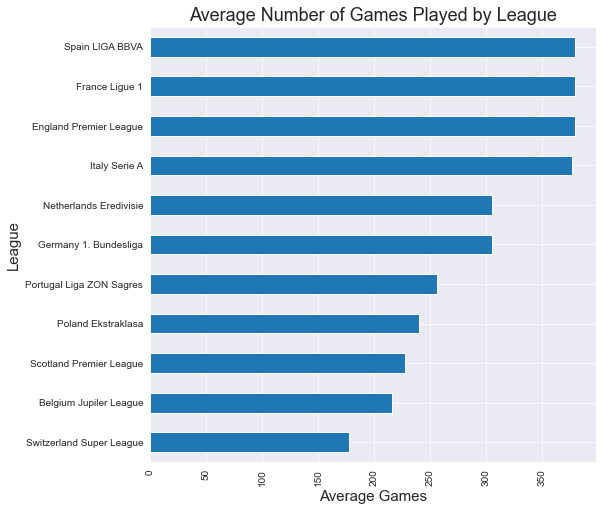

In [32]:
# Creating a bar chart for avergae number of total matches in one season 
#heights = match_df.groupby(['season', 'league']).count().groupby('league').mean().result
#labels = match_df.league.drop_duplicates().to_numpy()
#location = [x for x in range(len(labels))]

#plt.bar(location, height=heights, tick_label=labels)

avg_games.plot(kind='barh')

plt.xticks(rotation=90)
plt.title('Average Number of Games Played by League', fontsize=18)
plt.ylabel('League', fontsize=15)
plt.xlabel('Average Games', fontsize=15)
plt.gcf().set_size_inches(8, 8);

#### Findings
> The Spanish league (Spain LIGA) and the French league (France Ligue) hold the most average matches played every season with 380 games. On the other hand, the Switzerland Super League holds the minimum matches played every season with only 177 games.

### 2. Which season witnessed the most number of goals?

In [33]:
match_df['total_goals'] = match_df['home_team_goal'] + match_df['away_team_goal']
match_df.head()

,match_id,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,league,country,result,total_goals
0,492473,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,Belgium Jupiler League,Belgium,Tie,2
1,492474,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,Belgium Jupiler League,Belgium,Tie,0
2,492475,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,Belgium Jupiler League,Belgium,Away Win,3
3,492476,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,Belgium Jupiler League,Belgium,Home Win,5
4,492477,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,Belgium Jupiler League,Belgium,Away Win,4


In [34]:
#Total number of goals scored in every season
goals = match_df.groupby('season')['total_goals'].sum()
goals

season
2008/2009    8672
2009/2010    8632
2010/2011    8749
2011/2012    8747
2012/2013    9039
2013/2014    8389
2014/2015    8897
2015/2016    9162
Name: total_goals, dtype: int64

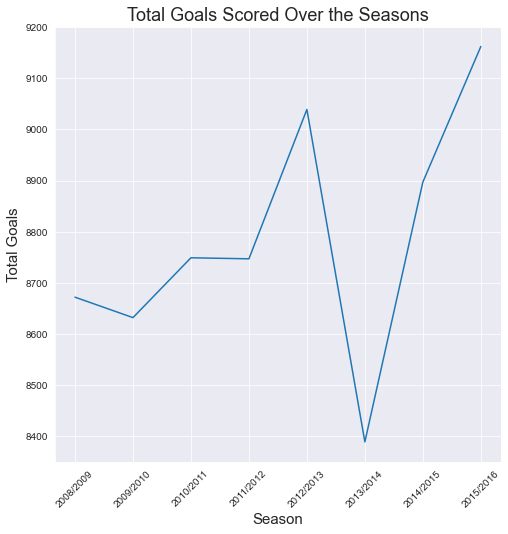

In [35]:
goals.plot(kind='line')
plt.xlabel('Season', fontsize=15)
plt.ylabel('Total Goals', fontsize=15)
plt.title('Total Goals Scored Over the Seasons', fontsize=18)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(8, 8);

#### Findings
> The above line graph shows that between 2008 and 2016, the season of 2015/2016 witnessed a peak in total number of goals scored while the season of 2013/2014 witnessed a drop in the number of goals scored during that period.

### 3. Who are the players that scored an overall rating closest to the potential rating?

In [36]:
df = player_df.groupby('player_name')[['overall_rating', 'potential']].mean()
df

,overall_rating,potential
player_name,,
Aaron Appindangoye,63.600000,67.600000
Aaron Cresswell,66.969697,74.484848
Aaron Doran,67.000000,74.192308
Aaron Galindo,69.086957,70.782609
Aaron Hughes,73.240000,74.680000
...,...,...
Zsolt Low,67.571429,72.857143
Zurab Khizanishvili,70.750000,78.125000
Zvjezdan Misimovic,80.000000,81.700000


In [37]:
df['ratio'] = (df['overall_rating']/df['potential'])*100
df

,overall_rating,potential,ratio
player_name,,,
Aaron Appindangoye,63.600000,67.600000,94.082840
Aaron Cresswell,66.969697,74.484848,89.910496
Aaron Doran,67.000000,74.192308,90.305858
Aaron Galindo,69.086957,70.782609,97.604423
Aaron Hughes,73.240000,74.680000,98.071773
...,...,...,...
Zsolt Low,67.571429,72.857143,92.745098
Zurab Khizanishvili,70.750000,78.125000,90.560000
Zvjezdan Misimovic,80.000000,81.700000,97.919217


In [38]:
top10 = df['ratio'].sort_values(ascending=False).head(10)
top10

player_name
Ibrahim Tall        108.333333
Jason Koumas        108.333333
Rafik Saifi         108.000000
Javier Chevanton    107.571429
Matt Moussilou      106.764168
Kanga Akale         106.268657
Vlad Munteanu       106.250000
Johann Vogel        106.153846
Andrea Parola       106.054688
Theo Lucius         105.729167
Name: ratio, dtype: float64

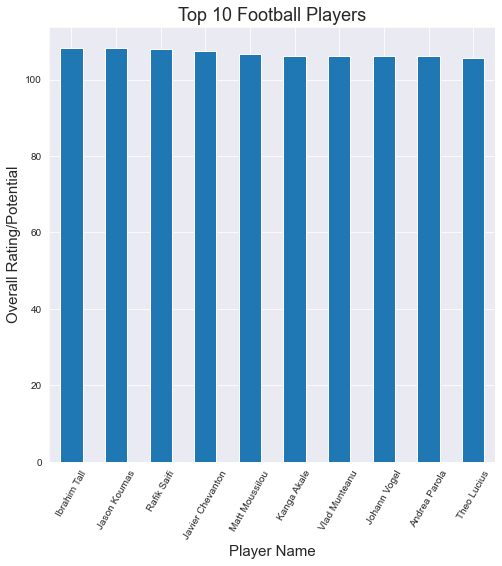

In [39]:
top10.plot(kind='bar')
plt.xlabel('Player Name', fontsize=15)
plt.ylabel('Overall Rating/Potential', fontsize=15)
plt.title('Top 10 Football Players', fontsize=18)
plt.xticks(rotation=60)
plt.gcf().set_size_inches(8, 8);

#### Findings
> The bar graph above reveals the top ten players who scored average ovaerall rating higher than the potential. Football player Ibrahim Tall received a ratio of %108.3 of his potentail rating.

In [41]:
#Closing Database Connection
cn.close()

<a id='conclusions'></a>
## Conclusions

### Results
Our data suggest that:
> 1. The average games played every season in the 11 european leagues ranges between 178 and 380 games, with Switzerland having the minimum (178) and Spain taking the top spot with France (380).
> 2. Between 2008 and 2016, the total number of goals over the years with the the exception of season 2013/2014 wich witness a drop of total goals scored.


### Limitations
Some of the limitations we have faced doing our analysis:
> 1. The database does not have a proper explanation for the data.
> 2. Some of the database tables have large number of columns, especially the Match table with (115) columns. This forced us to use SQL query to join tables and choosing only the necessary columns to answer questions.

### References
> N/A